In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [30]:
df=pd.read_excel("50_StartUp.xlsx")
df.to_csv('output.csv', index=False)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [32]:
df.shape

(50, 5)

In [33]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [34]:
df_new=df.copy()
df_new.drop(["State"], axis = 1, inplace = True) 

corr=df_new.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

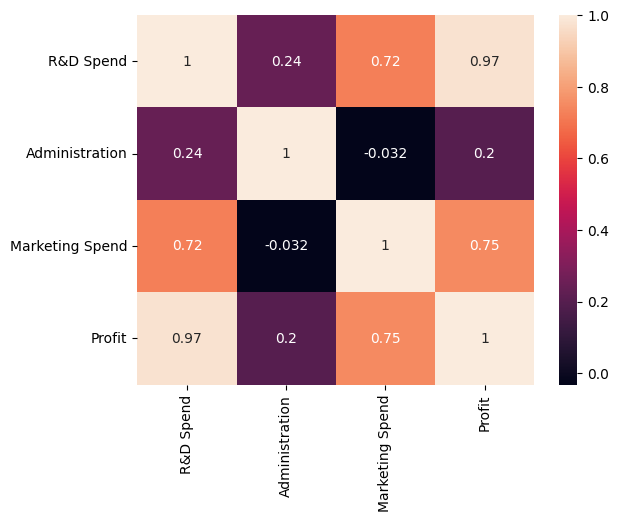

In [35]:
sns.heatmap(corr, annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

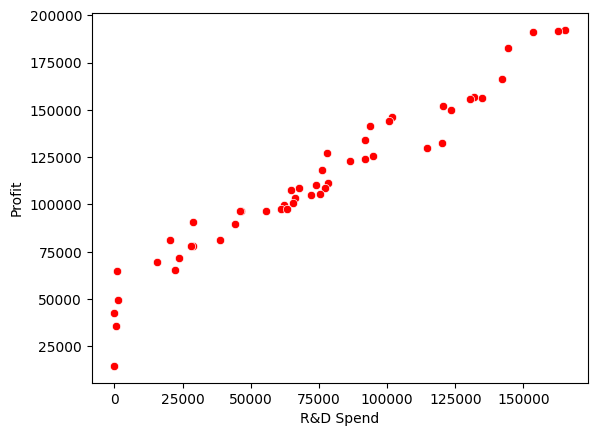

In [36]:
sns.scatterplot(x="R&D Spend",y="Profit",data=df_new,color="red")

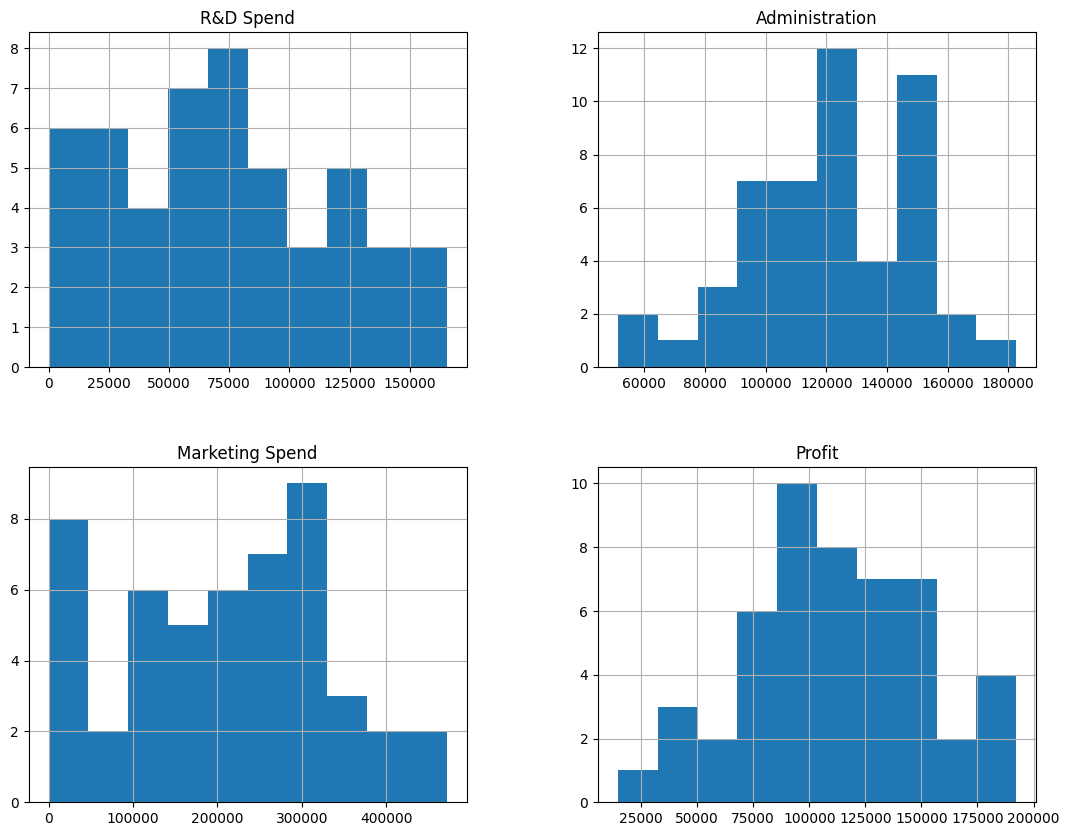

In [37]:
df.hist(figsize=(13,10))
plt.show()

In [38]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Encode object to numarical values

In [39]:
df["State"].unique()


array(['New York', 'California', 'Florida'], dtype=object)

In [41]:
df_state=pd.get_dummies(df["State"],prefix="State")

df_state

,State_California,State_Florida,State_New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False
5,False,False,True
6,True,False,False
7,False,True,False
8,False,False,True
9,True,False,False


In [42]:
df=pd.concat([df,df_state],axis=1)

In [53]:
# df.drop(["State_Florida"],axis=1,inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,False


In [54]:
df.drop(["State"],axis=1,inplace=True)


In [55]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False
2,153441.51,101145.55,407934.54,191050.39,False,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,False,False


In [57]:
x=df.drop("Profit",axis=1)
y=df["Profit"]

In [58]:
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [59]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

In [60]:
model=lm.fit(x_train,y_train)

In [61]:
y_pred=model.predict(x_test)
y_pred

array([ 82650.91171141, 114969.39758648, 118676.50929825,  96544.92731097,
       100747.90907156,  57717.39681268,  77491.15050368, 129634.19513027,
       102260.23338706, 113685.43462948,  88383.71117127, 177651.49084482,
       133416.99793513,  99051.42621284, 155021.60473219])

In [66]:
df=pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"diff between y_pred and y_test" :abs(y_pred-y_test)})

In [67]:
df

,y_test,y_pred,diff between y_pred and y_test
39,81005.76,82650.911711,1645.151711
26,105733.54,114969.397586,9235.857586
22,110352.25,118676.509298,8324.259298
31,97483.56,96544.927311,938.632689
29,101004.64,100747.909072,256.730928
43,69758.98,57717.396813,12041.583187
41,77798.83,77491.150504,307.679496
17,125370.37,129634.195130,4263.825130
25,107404.34,102260.233387,5144.106613
23,108733.99,113685.434629,4951.444629


In [68]:
from sklearn.metrics import  mean_absolute_error 
MAE=mean_absolute_error(y_test,y_pred)
MAE

6657.417321576695

In [71]:
RMSE=np.sqrt(MAE)
RMSE

81.5929979935576

In [72]:
model.score(x_train,y_train)

0.956142267350216

# Feature Selection Backword Elimination


In [74]:
import statsmodels.api as sm 